# Predicting House Prices: Data Analysis and Data Cleaning

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.common import random_state
from scipy import stats

## 1. Loading up The Data and Displaying it:

* Let's load the data and analyze its rows columns.


In [13]:
df=pd.read_csv('home_price.csv')
df=df.drop_duplicates() # Dropping duplicated rows
df.info() # Display general information about column names, row count, and data type
print(df.describe()) # Display general information about the data

<class 'pandas.core.frame.DataFrame'>
Index: 20131 entries, 0 to 20325
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Net_Metrekare       20131 non-null  int64  
 1   Brüt_Metrekare      20131 non-null  float64
 2   Oda_Sayısı          19876 non-null  float64
 3   Bulunduğu_Kat       17859 non-null  object 
 4   Eşya_Durumu         12808 non-null  object 
 5   Binanın_Yaşı        20131 non-null  object 
 6   Isıtma_Tipi         20131 non-null  object 
 7   Fiyat               20131 non-null  float64
 8   Şehir               20131 non-null  object 
 9   Binanın_Kat_Sayısı  20131 non-null  int64  
 10  Kullanım_Durumu     20131 non-null  object 
 11  Yatırıma_Uygunluk   14599 non-null  object 
 12  Takas               14289 non-null  object 
 13  Tapu_Durumu         9659 non-null   object 
 14  Banyo_Sayısı        20085 non-null  float64
dtypes: float64(4), int64(2), object(9)
memory usage: 2.5+ MB
 

## 2. Data Analysis:

### Empty data:
* from our info method, we can see that several features have missing rows: Tapu_Durumu,Takas, Yatırıma_Uygunluk,Banyo_Sayısı,Oda_Sayısı,Bulunduğu_Kat,Eşya_Durumu.
* for Tapu_Durumu,Takas, Yatırıma_Uygunluk,Oda_Sayısı,Bulunduğu_Kat,Eşya_Durumu, we will be filling the category 'unknown', since filling so many rows with specific values could make wrong assumptions about the data and can create fake correlation, instead the best choice is to fill them with unknown.
* for banyo sayisi, we will be simply removing the rows with missing values, since it is a small percentage of the total data.

In [14]:
df.isnull().sum() # see how much empty data we have
category_gaps=["Tapu_Durumu","Takas","Yatırıma_Uygunluk","Eşya_Durumu",'Bulunduğu_Kat'] # make a list of categorical features with empty rows
df[category_gaps] = df[category_gaps].fillna('Unknown') # fill empty rows with 'Unknown'
print(df[category_gaps].isnull().sum()) # check if there are any empty rows left
df.dropna(subset=["Oda_Sayısı","Banyo_Sayısı"], inplace=True) # drop rows with empty rows in Oda_Sayısı and Banyo_Sayısı since they are small part of data
df.info()

Tapu_Durumu          0
Takas                0
Yatırıma_Uygunluk    0
Eşya_Durumu          0
Bulunduğu_Kat        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 19831 entries, 0 to 20322
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Net_Metrekare       19831 non-null  int64  
 1   Brüt_Metrekare      19831 non-null  float64
 2   Oda_Sayısı          19831 non-null  float64
 3   Bulunduğu_Kat       19831 non-null  object 
 4   Eşya_Durumu         19831 non-null  object 
 5   Binanın_Yaşı        19831 non-null  object 
 6   Isıtma_Tipi         19831 non-null  object 
 7   Fiyat               19831 non-null  float64
 8   Şehir               19831 non-null  object 
 9   Binanın_Kat_Sayısı  19831 non-null  int64  
 10  Kullanım_Durumu     19831 non-null  object 
 11  Yatırıma_Uygunluk   19831 non-null  object 
 12  Takas               19831 non-null  object 
 13  Tapu_Durumu         19831 no

### Categorical Data Handling:
* Since machine learning models cannot work with categorical data, we need to convert them into numerical data. 
* I will use two approaches:
     1. One-Hot Encoding for data with nominal categories.
     2. Ordinal Encoding for data with non-nominal categories(like floor, room count, etc.).

In [ ]:
nominal_columns = [
    "Isıtma_Tipi",'Tapu_Durumu', "Kullanım_Durumu",
    "Takas",
    "Yatırıma_Uygunluk",
    "Eşya_Durumu",
    "Şehir"
]# make a list of nominal columns to get dummies
df= pd.get_dummies(df, columns=nominal_columns,drop_first=True) # getting dummies for nominal columns
print(df.head())
# dictionary to apply ordinal encoding on age column
age_rules = {
    '0 (Yeni)': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5-10': 5,
    '11-15': 6,
    '16-20': 7,
    '21 Ve Üzeri': 8
}

df['Binanın_Yaşı'] = df['Binanın_Yaşı'].map(age_rules) # map the rules to the column to apply ordinal encoding


print(df['Binanın_Yaşı'].head())
df.info() # check the info of the dataframe

   Net_Metrekare  Brüt_Metrekare  Oda_Sayısı      Bulunduğu_Kat Binanın_Yaşı  \
0            120           150.0         4.0              4.Kat  21 Ve Üzeri   
1            100           125.0         4.0              3.Kat            4   
2             89            95.0         3.0              4.Kat     0 (Yeni)   
3             40            55.0         2.0              6.Kat     0 (Yeni)   
4            140           150.0         4.0  Düz Giriş (Zemin)         5-10   

       Fiyat  Binanın_Kat_Sayısı  Banyo_Sayısı  Isıtma_Tipi_Doğalgaz Sobalı  \
0   950000.0                   6           1.0                        False   
1  1250000.0                  10           1.0                        False   
2  1750000.0                  14           1.0                        False   
3  1300000.0                  14           1.0                        False   
4  1700000.0                   4           1.0                        False   

   Isıtma_Tipi_Güneş Enerjisi  ...  Şehir_ka

* we are gonna clean the floor column because it is a numeric column but it is not numeric and there is different wordings for similar categories


In [ ]:
# Define the function for cleaning the floor column
def clean_floor(row):
    floor = str(row['Bulunduğu_Kat'])
    
    # Handle Roof/Top floors: use the total floor count of the building
    if 'Çatı' in floor:
        return row['Binanın_Kat_Sayısı']
    
    # Handle Ground/Garden/Villa types -> 0
    if floor in ['Düz Giriş (Zemin)', 'Yüksek Giriş', 'Müstakil', 'Bahçe Katı', 'Bahçe Dublex', 'Villa Tipi']:
        return 0
    
    # Handle Basements
    if 'Bodrum' in floor:
        return -1
    if 'Kot' in floor:
        # Extract the negative number usually in parentheses like "Kot 1 (-1).Kat"
        try:
            # simple parsing: find the number after 'Kot '
            parts = floor.split()
            for part in parts:
                if part.lstrip('-').isdigit(): # checks for '1', '-1', etc.
                    val = int(part)
                    return -val if val > 0 else val # Ensure it's negative
            # If parsing fails, default to -1
            return -1
        except:
            return -1
            
    # Handle Standard "X.Kat"
    try:
        # Extract the first number
        import re
        num = re.match(r'(-?\d+)', floor)
        if num:
            return int(num.group(1))
    except:
        pass
        
    return 0 # Default fallback

# Apply the function
df['Bulunduğu_Kat'] = df.apply(clean_floor, axis=1)

# Inspect the result
print("New unique values in Bulunduğu_Kat:")
print(df['Bulunduğu_Kat'].unique())
print("\nInfo:")
print(df['Bulunduğu_Kat'].describe())
df.info()

New unique values in Bulunduğu_Kat:
[ 4  3  6  0 12  2  8  5 14 16  1 17  9  7 11 10 15 13 -3 18 21 -2 -1 26
 -4 40 19 30 22]

Info:
count    19831.00000
mean         2.58822
std          2.68384
min         -4.00000
25%          1.00000
50%          2.00000
75%          4.00000
max         40.00000
Name: Bulunduğu_Kat, dtype: float64


## EDA and Removing Outliers in the price column


<Axes: xlabel='Fiyat'>

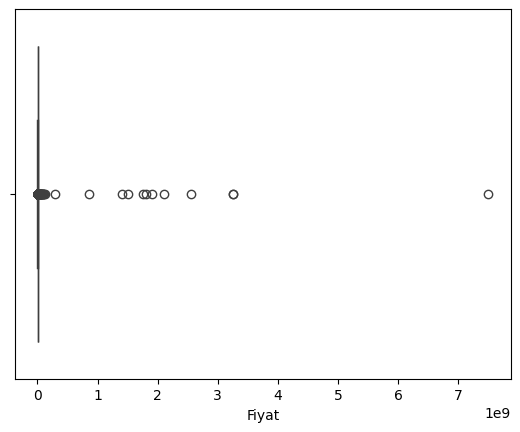

In [18]:
sns.boxplot(x=df['Fiyat'],data=df)

* As we can see there are big outliers like 7*10^9 and other unusual values.
* We are gonna use the IQR method to remove these outliers.


Removing outliers above: 5,801,250


<Axes: xlabel='Fiyat'>

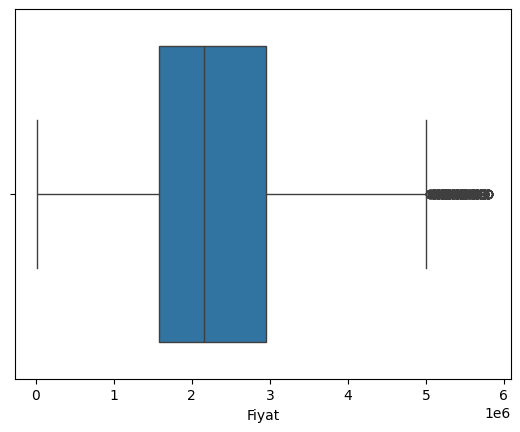

In [ ]:
# Use IQR to filter outliers dynamically
Q1 = df['Fiyat'].quantile(0.25) # Define the 75th percentile
Q3 = df['Fiyat'].quantile(0.75) # Define the 25th percentile
IQR = Q3 - Q1 # Interquartile range
upper_bound = Q3 + 1.5 * IQR # Upper bound for outliers

print(f"Removing outliers above: {upper_bound:,.0f}")
df = df[df['Fiyat'] < upper_bound]

sns.boxplot(x=df['Fiyat'],data=df)

* There are outliers in the meters colums  like 110000 m2  net and 2.92 trilion m2 gross which are not possible , especially the gross ,which is bigger than the surface area of the earth!
* We are going to set a boundary for the gross and net area columns to be:10 m2 to 1000 m2 
* This fixes the issue with correlation between gross and net area, and the target column price , which logically are highly correlated



In [20]:
# 1. Visualize the madness
print("Max Gross Size:", df['Brüt_Metrekare'].max())
print("Max Net Size:", df['Net_Metrekare'].max())

# 2. Clean the Size (Keep reasonable limits, e.g., 10m² to 1000m²)
# Most apartments are between 40 and 300. Villas might go up to 900.
df = df[(df['Brüt_Metrekare'] > 10) & (df['Brüt_Metrekare'] < 1000)]
df = df[(df['Net_Metrekare'] > 10) & (df['Net_Metrekare'] < 900)]

# 3. Check Correlation again
print(df[['Fiyat', 'Brüt_Metrekare', 'Net_Metrekare']].corr())

Max Gross Size: 29222222222222.0
Max Net Size: 110000
                   Fiyat  Brüt_Metrekare  Net_Metrekare
Fiyat           1.000000        0.403223       0.425932
Brüt_Metrekare  0.403223        1.000000       0.835328
Net_Metrekare   0.425932        0.835328       1.000000


Top 10 features with correlation to the target variable: 
Fiyat                        1.000000
Oda_Sayısı                   0.474112
Banyo_Sayısı                 0.430135
Net_Metrekare                0.425932
Brüt_Metrekare               0.403223
Şehir_antalya                0.214130
Isıtma_Tipi_Klimalı          0.118467
Isıtma_Tipi_Yerden Isıtma    0.109816
Şehir_kocaeli                0.101778
Şehir_canakkale              0.093869
Şehir_izmir                  0.076007
Name: Fiyat, dtype: float64
Bottom 10 features with correlation to the target variable: 
Yatırıma_Uygunluk_Unknown         -0.055900
Şehir_kayseri                     -0.067377
Eşya_Durumu_Unknown               -0.068377
Şehir_kirikkale                   -0.077668
Şehir_kilis                       -0.084555
Şehir_kars                        -0.089024
Isıtma_Tipi_Kombi Doğalgaz        -0.110745
Eşya_Durumu_Eşyalı                -0.124142
Kullanım_Durumu_Kiracı Oturuyor   -0.145562
Binanın_Yaşı                      -0.18

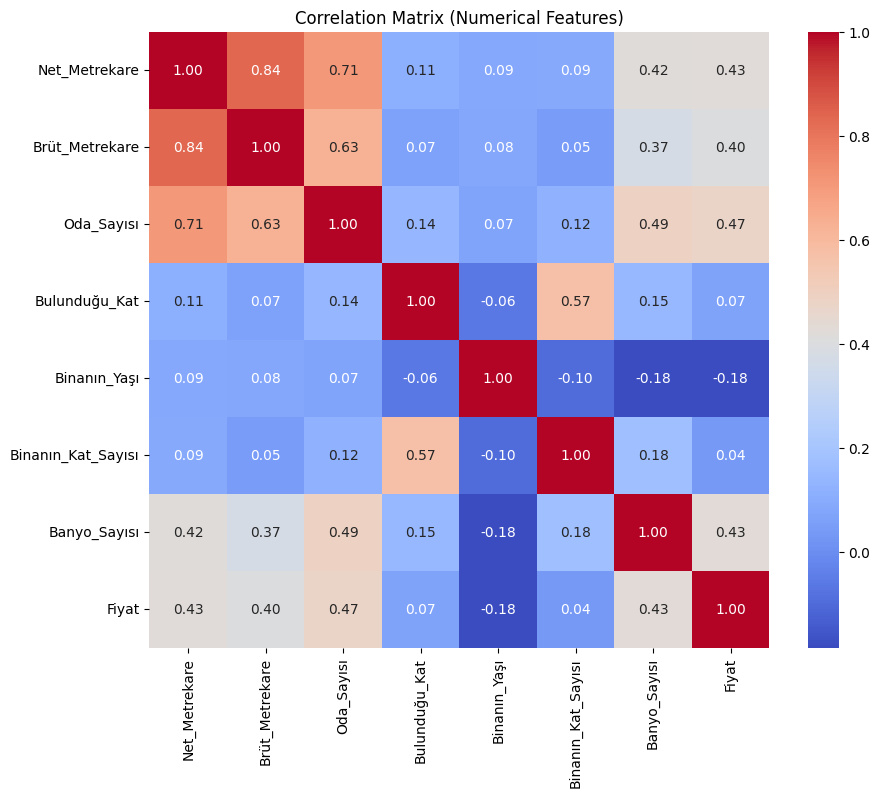

Fixed 0-bathroom entries.
Dropping 69 houses with impossible floors...
Remaining Clean Data: (17971, 86)


In [ ]:
# Make Correlation Matrix and show top 10 and bottom 10 features correlated with the target variable
# since I encoded before showing correlation matrix, making correlation matrix with all of the features would be too messy, so we filter out the most important basic so we can make a clean correlation matrix
correlation = df.corr()['Fiyat'].sort_values(ascending=False)
print('Top 10 features with correlation to the target variable: ')
print(correlation.head(11))
print('Bottom 10 features with correlation to the target variable: ')
print(correlation.tail(10))
numerical_cols = ['Net_Metrekare', 'Brüt_Metrekare', 'Oda_Sayısı', 'Bulunduğu_Kat', 
                  'Binanın_Yaşı', 'Binanın_Kat_Sayısı', 'Banyo_Sayısı', 'Fiyat']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()
#---- Antigravity---
df.loc[df['Banyo_Sayısı'] == 0, 'Banyo_Sayısı'] = 1
print(f"Fixed 0-bathroom entries.")

impossible_floor = df[df['Bulunduğu_Kat'] > df['Binanın_Kat_Sayısı']]
print(f"Dropping {len(impossible_floor)} houses with impossible floors...")

df = df.drop(impossible_floor.index)
# Create a filter for "Weird" homes
# 1. Too cheap in Antalya (< 500k)
mask_antalya_cheap = (df['Şehir_antalya'] == True) & (df['Fiyat'] < 500000)

# 2. Crazy expensive per square meter (> 75k/m2)
mask_luxury_outlier = (df['Fiyat'] / df['Brüt_Metrekare']) > 75000

# 3. Suspiciously large but cheap (> 400m2 but < 2M)
mask_large_cheap = (df['Brüt_Metrekare'] > 400) & (df['Fiyat'] < 2000000)

# Apply filters (Keep rows that are NOT in any of these masks)
df_clean = df[~(mask_antalya_cheap | mask_luxury_outlier | mask_large_cheap)]

# 3. Final Sanity Check
print("Remaining Clean Data:", df.shape)

In [ ]:
df.to_csv('cleaned_data.csv',index=False) # save cleaned data

# Observation from data cleaning and summary:
*Initial data preparation involved dropping duplicate entries to ensure uniqueness and handling missing values by filling gaps in categorical features like deed status or exchange possibility with 'Unknown' to avoid bias, while rows missing essential numerical data for room or bathroom counts were removed entirely.

*Feature encoding was performed to make the data machine-readable, utilizing One-Hot Encoding for nominal variables such as City and Heating Type, and applying a custom Ordinal Encoding map to the 'Building Age' column to convert text ranges into a ranked numerical scale from 0 to 8.

*The 'Floor' column underwent extensive parsing via a custom function that converted non-numeric descriptors like 'Garden' or 'Entrance' to 0, handled basement levels with negative integers, and logically assigned 'Roof' apartments to the building's top floor number.

*Statistical outlier removal was applied using the Interquartile Range (IQR) method to filter out prices exceeding approximately 5.8 million, alongside setting strict physical limits for property size to exclude impossible gross or net square meterage, such as values exceeding 1,000 m² or unrealistic entries like 2.9 trillion.

*Final consistency checks cleaned up logical errors by correcting zero-bathroom entries to one, removing rows where the listed floor was higher than the building's total floor count, and applying specific filters to exclude suspicious anomalies like luxury homes priced too low per square meter or large properties in Antalya under 500,000, the final dataset retained 17971 rows and 86 columns after cleaning.